In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [3]:
sales_data = pd.read_csv('../../Data/supermarket/supermarket_sales.csv')

In [4]:
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Selecionando colunas relevantes para o clustering
selected_columns = ['Gender', 'Customer type', 'Product line', 'Total', 'Payment', 'Rating']

# Filtrando o dataset
filtered_data = sales_data[selected_columns]

# Convertendo variáveis categóricas em numéricas com one-hot encoding
data_encoded = pd.get_dummies(filtered_data, columns=['Gender', 'Customer type', 'Product line', 'Payment'])

# Normalizando as variáveis numéricas ('Total' e 'Rating')
scaler = StandardScaler()
data_encoded[['Total', 'Rating']] = scaler.fit_transform(data_encoded[['Total', 'Rating']])

# Visualizando as primeiras linhas dos dados codificados e normalizados
data_encoded.head()


,Total,Rating,Gender_Female,Gender_Male,Customer type_Member,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0.919607,1.238443,True,False,True,False,False,False,False,True,False,False,False,False,True
1,-0.987730,1.529527,True,False,False,True,True,False,False,False,False,False,True,False,False
2,0.071446,0.248760,False,True,False,True,False,False,False,False,True,False,False,True,False
3,0.675780,0.830927,False,True,True,False,False,False,False,True,False,False,False,False,True
4,1.267125,-0.973790,False,True,False,True,False,False,False,False,False,True,False,False,True


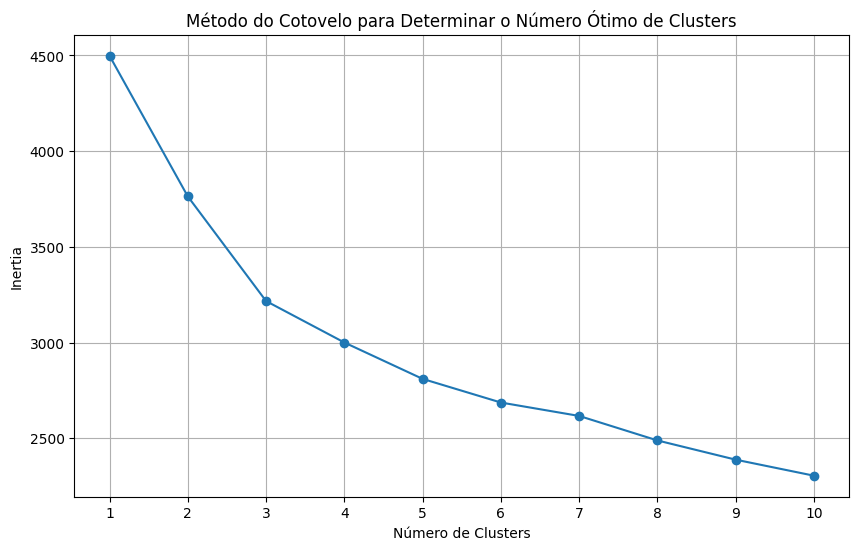

In [6]:
# Aplicando o método do cotovelo para encontrar o número ótimo de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [7]:
# Aplicando o método k-means para os dados do conjunto de dados
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_encoded)


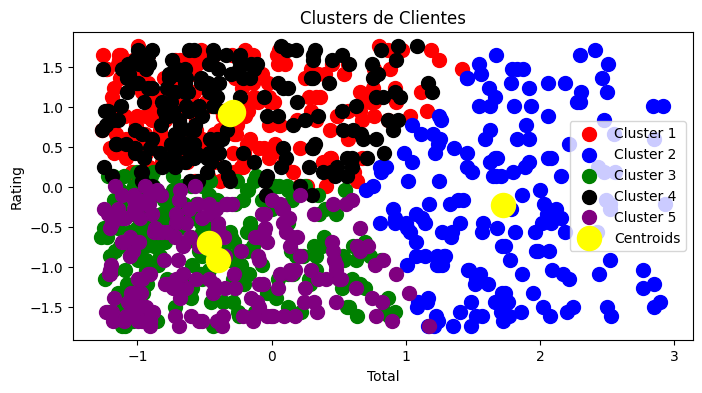

In [8]:
#Plotando os clusters
plt.figure(figsize=(8, 4))
plt.scatter(data_encoded.iloc[pred_y == 0, 0], data_encoded.iloc[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_encoded.iloc[pred_y == 1, 0], data_encoded.iloc[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_encoded.iloc[pred_y == 2, 0], data_encoded.iloc[pred_y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_encoded.iloc[pred_y == 3, 0], data_encoded.iloc[pred_y == 3, 1], s=100, c='black', label='Cluster 4')
plt.scatter(data_encoded.iloc[pred_y == 4, 0], data_encoded.iloc[pred_y == 4, 1], s=100, c='purple', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Total')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [9]:
sales_data['Cluster'] = kmeans.labels_
cluster_distribution = sales_data['Cluster'].value_counts().sort_index()

# Exibindo a distribuição dos clusters
cluster_distribution


Cluster
0    199
1    177
2    230
3    204
4    190
Name: count, dtype: int64

In [10]:
# Calculando estatísticas descritivas para cada cluster
cluster_stats = sales_data.groupby('Cluster')[['Total', 'Rating']].describe()
cluster_stats


Total                                                           \
         count        mean         std       min         25%        50%   
Cluster                                                                   
0        199.0  251.865452  160.896745   13.1670  117.521250  218.07450   
1        177.0  746.693263  129.709969  495.3165  634.378500  736.43850   
2        230.0  207.711822  138.242374   10.6785   91.000875  182.02275   
3        204.0  246.444059  154.063834   12.6945  133.203000  208.55625   
4        190.0  224.381629  149.703369   16.1070   91.134750  195.77250   

                               Rating                                       \
                75%        max  count      mean       std  min    25%  50%   
Cluster                                                                      
0        373.779000   671.7900  199.0  8.584925  0.833075  7.0  7.900  8.6   
1        832.944000  1042.6500  177.0  6.587571  1.646437  4.0  5.200  6.5   
2        293.517000   548.7615  230.0  5.767826  0.906941  4.0  5.000  5.8   
3        367.699500   616.9800  204.0  8.543627  0.867934  6.8  7.800  8.6   
4        340.396875   610.4910  190.0  5.414737  0.899026  4.0  4.625  5.4   

                      
           75%   max  
Cluster               
0        9.350  10.0  
1        7.900   9.9  
2        6.600   7.3  
3        9.300  10.0  
4        6.275   7.0

In [11]:
# Análise de Frequência para Variáveis Categóricas: Para variáveis categóricas (como Gender, Customer type, Product line, Payment), você pode analisar a frequência de cada categoria dentro dos clusters para identificar padrões específicos. Por exemplo, um cluster pode ter uma proporção maior de compras de uma linha de produtos específica ou uma predominância de um gênero.

categorical_vars = ['Gender', 'Customer type', 'Product line', 'Payment']

# Criando um dicionário para armazenar os resultados
cluster_category_frequencies = {}

for var in categorical_vars:
    # Agrupando os dados por 'Cluster' e então pela variável categórica, contando o número de ocorrências
    frequency = sales_data.groupby(['Cluster', var]).size().unstack(fill_value=0)
    # Salvando o resultado no dicionário
    cluster_category_frequencies[var] = frequency

# Agora, você pode acessar a frequência de cada variável categórica dentro dos clusters como segue
# Por exemplo, para 'Gender'
print(cluster_category_frequencies['Gender'])

# Repita para outras variáveis categóricas conforme necessário


Gender   Female  Male
Cluster              
0           107    92
1            94    83
2             0   230
3           110    94
4           190     0


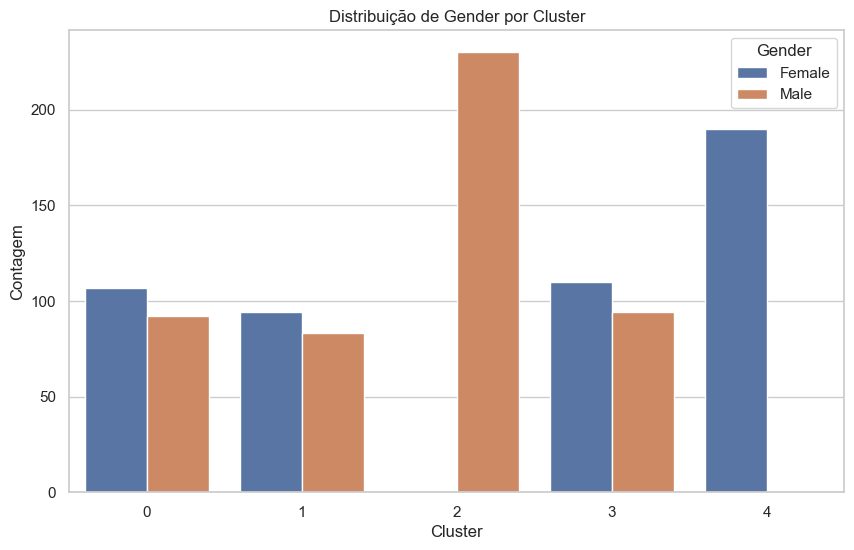

In [12]:
# Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Criando um gráfico de barras para visualizar a distribuição de Gender por Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Gender', data=sales_data)
plt.title('Distribuição de Gender por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Gender')
plt.show()


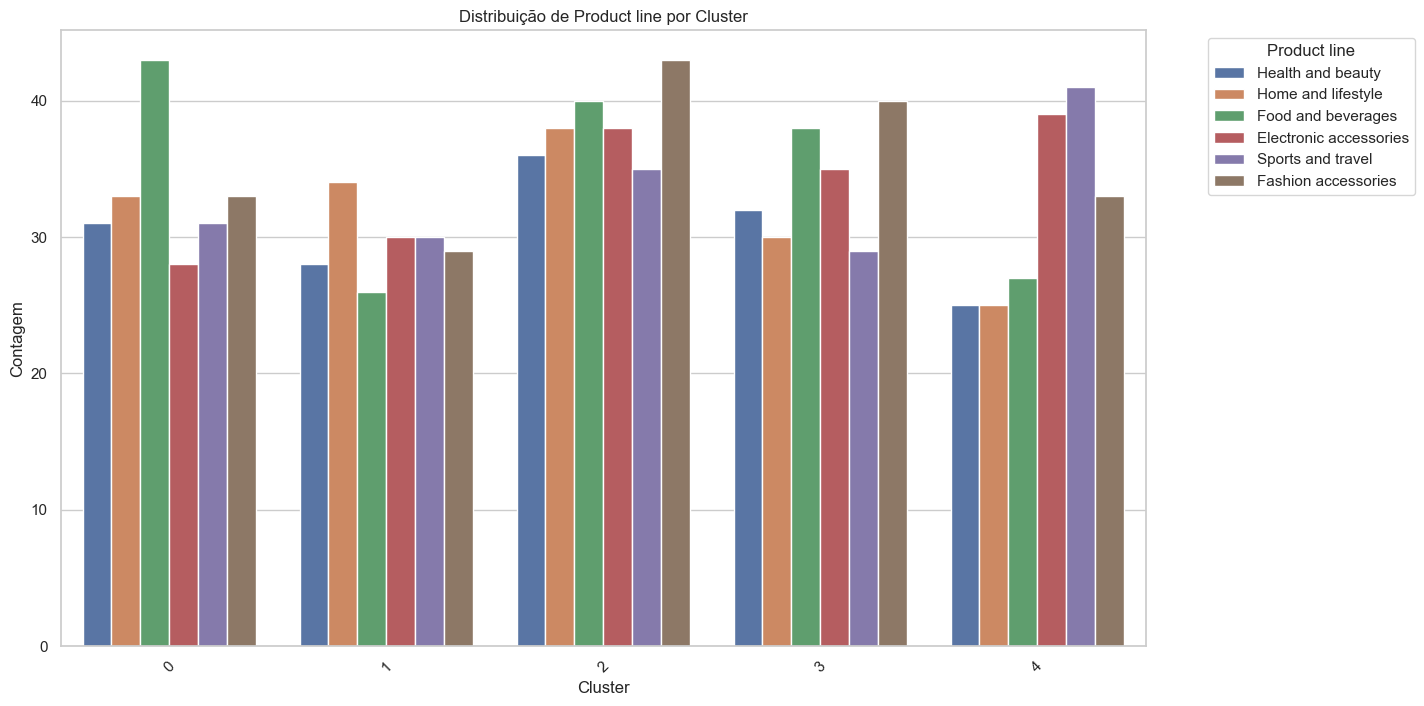

In [13]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Cluster', hue='Product line', data=sales_data)
plt.title('Distribuição de Product line por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Product line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45) # Isso ajuda a evitar que os rótulos no eixo X se sobreponham
plt.show()


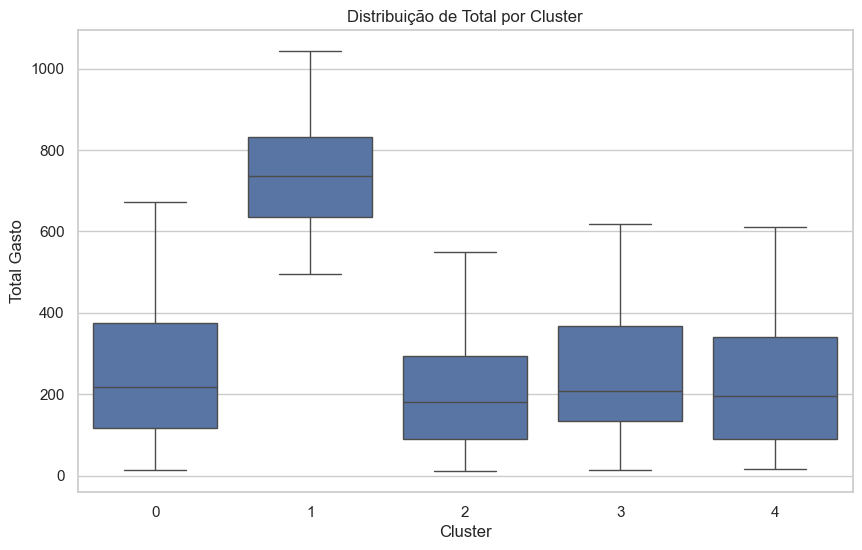

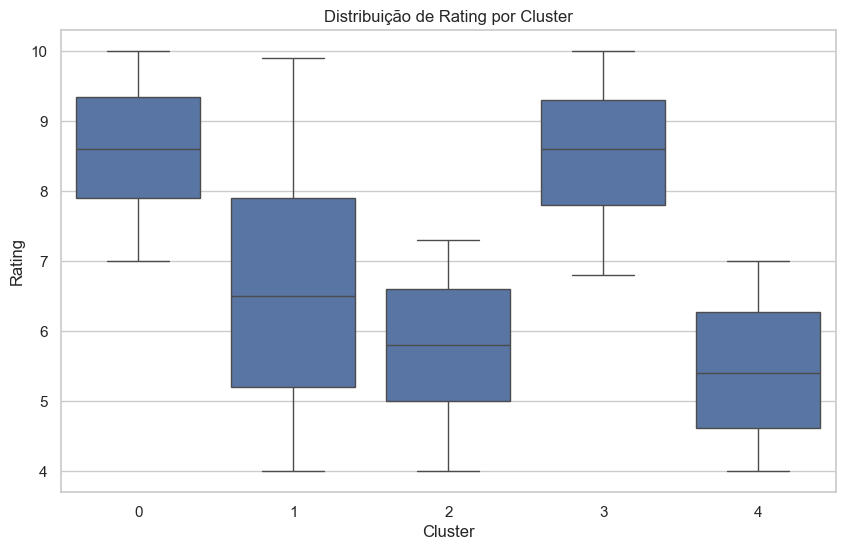

In [14]:
# Visualizando a distribuição de 'Total' por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total', data=sales_data)
plt.title('Distribuição de Total por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Gasto')
plt.show()

# Visualizando a distribuição de 'Rating' por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Rating', data=sales_data)
plt.title('Distribuição de Rating por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.show()


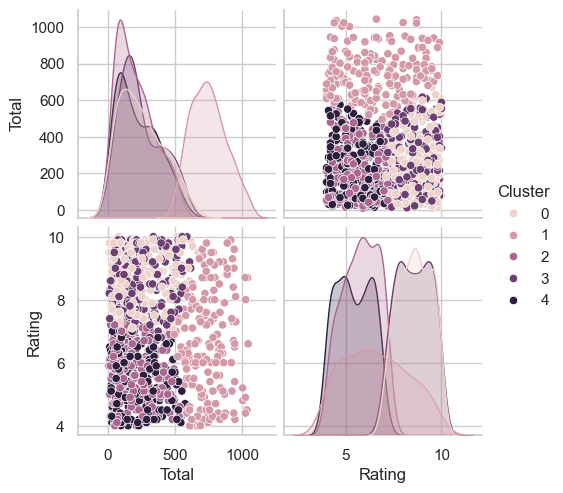

In [15]:
# Selecionando um subconjunto de variáveis numéricas para visualização
num_vars = ['Total', 'Rating']
data_for_pairplot = sales_data[num_vars + ['Cluster']]

# Criando o pairplot colorido por 'Cluster'
sns.pairplot(data_for_pairplot, hue='Cluster')
plt.show()


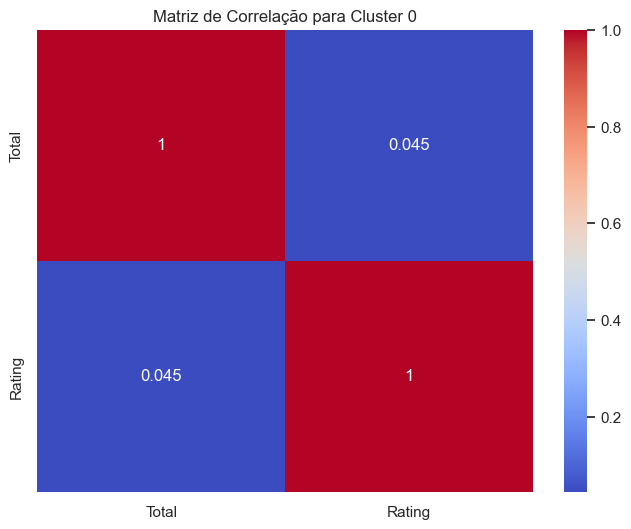

In [16]:
# Exemplo para o cluster 0
cluster_data = sales_data[sales_data['Cluster'] == 0]
corr_matrix = cluster_data[num_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação para Cluster 0')
plt.show()


C:\Users\flavi\AppData\Local\Temp\ipykernel_19224\1761533011.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total'], label=f'Cluster {cluster}', shade=True)
C:\Users\flavi\AppData\Local\Temp\ipykernel_19224\1761533011.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total'], label=f'Cluster {cluster}', shade=True)
C:\Users\flavi\AppData\Local\Temp\ipykernel_19224\1761533011.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Total'], label=f'Cluster {cluster}', shade=True)
C:\Users\flavi\AppData\Local\Temp\ipykernel_19224\1761533011.py:4: FutureWarning: 

`shade` is now deprecated in favor

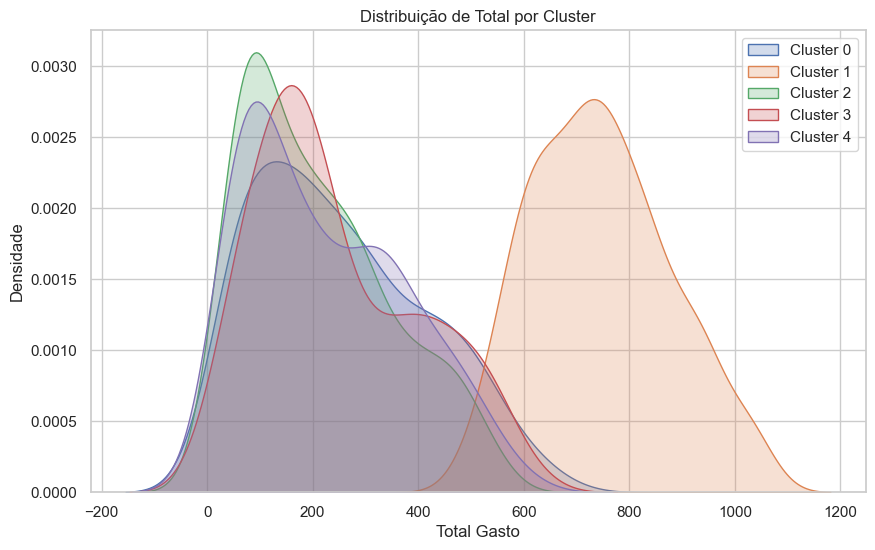

In [17]:
plt.figure(figsize=(10, 6))
for cluster in sorted(sales_data['Cluster'].unique()):
    subset = sales_data[sales_data['Cluster'] == cluster]
    sns.kdeplot(subset['Total'], label=f'Cluster {cluster}', shade=True)
plt.title('Distribuição de Total por Cluster')
plt.xlabel('Total Gasto')
plt.ylabel('Densidade')
plt.legend()
plt.show()


## Analisando o cluster 3

In [18]:
# Filtrando dados para Cluster 3
cluster_3_data = sales_data[sales_data['Cluster'] == 3]

# Análise descritiva básica para variáveis numéricas
desc_stats = cluster_3_data.describe()

# Contagem de categorias para variáveis categóricas
category_counts = cluster_3_data.select_dtypes(include=['object', 'category']).apply(pd.Series.value_counts)

print("Descrição Estatística de Variáveis Numéricas:\n", desc_stats)


Descrição Estatística de Variáveis Numéricas:
        Unit price    Quantity      Tax 5%       Total        cogs  \
count  204.000000  204.000000  204.000000  204.000000  204.000000   
mean    50.376225    5.009804   11.735431  246.444059  234.708627   
std     24.391998    2.586418    7.336373  154.063834  146.727461   
min     10.560000    1.000000    0.604500   12.694500   12.090000   
25%     30.662500    3.000000    6.343000  133.203000  126.860000   
50%     49.780000    5.000000    9.931250  208.556250  198.625000   
75%     69.077500    7.000000   17.509500  367.699500  350.190000   
max     99.790000   10.000000   29.380000  616.980000  587.600000   

       gross margin percentage  gross income      Rating  Cluster  
count             2.040000e+02    204.000000  204.000000    204.0  
mean              4.761905e+00     11.735431    8.543627      3.0  
std               8.903634e-16      7.336373    0.867934      0.0  
min               4.761905e+00      0.604500    6.800000   

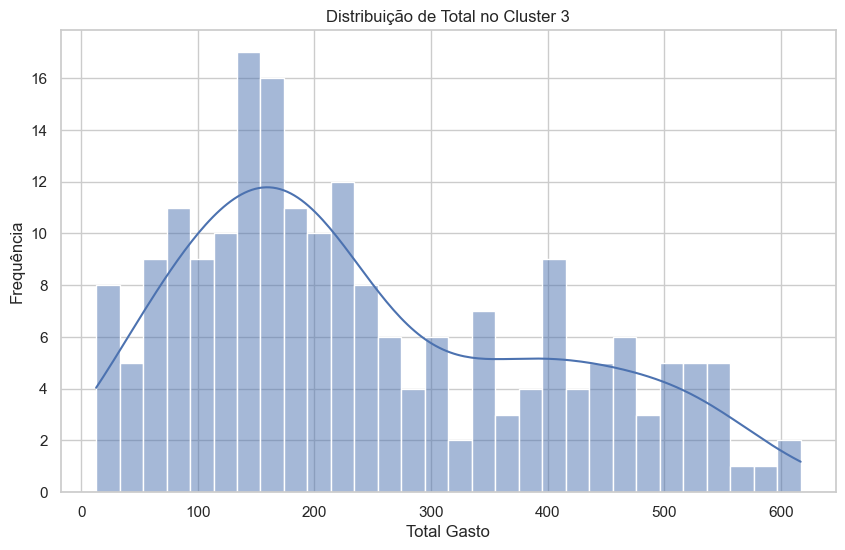

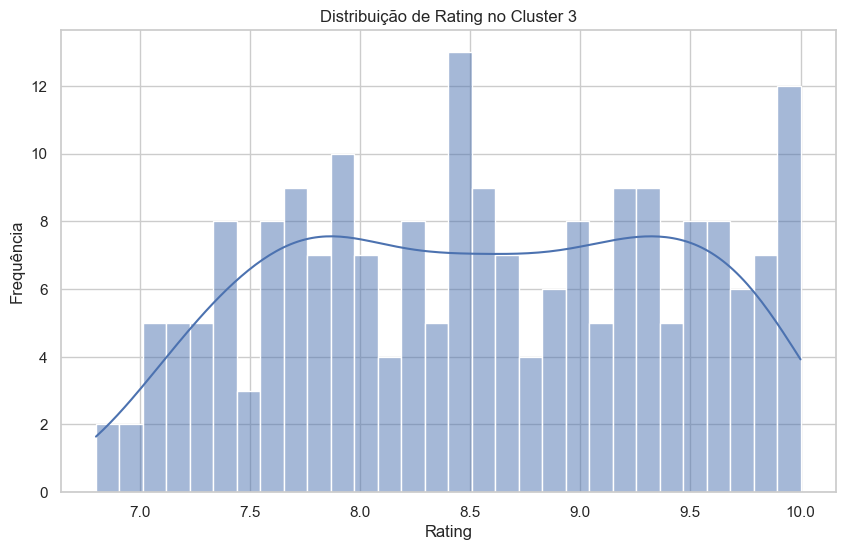

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição de 'Total'
plt.figure(figsize=(10, 6))
sns.histplot(cluster_3_data['Total'], bins=30, kde=True)
plt.title('Distribuição de Total no Cluster 3')
plt.xlabel('Total Gasto')
plt.ylabel('Frequência')
plt.show()

# Distribuição de 'Rating'
plt.figure(figsize=(10, 6))
sns.histplot(cluster_3_data['Rating'], bins=30, kde=True)
plt.title('Distribuição de Rating no Cluster 3')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.show()


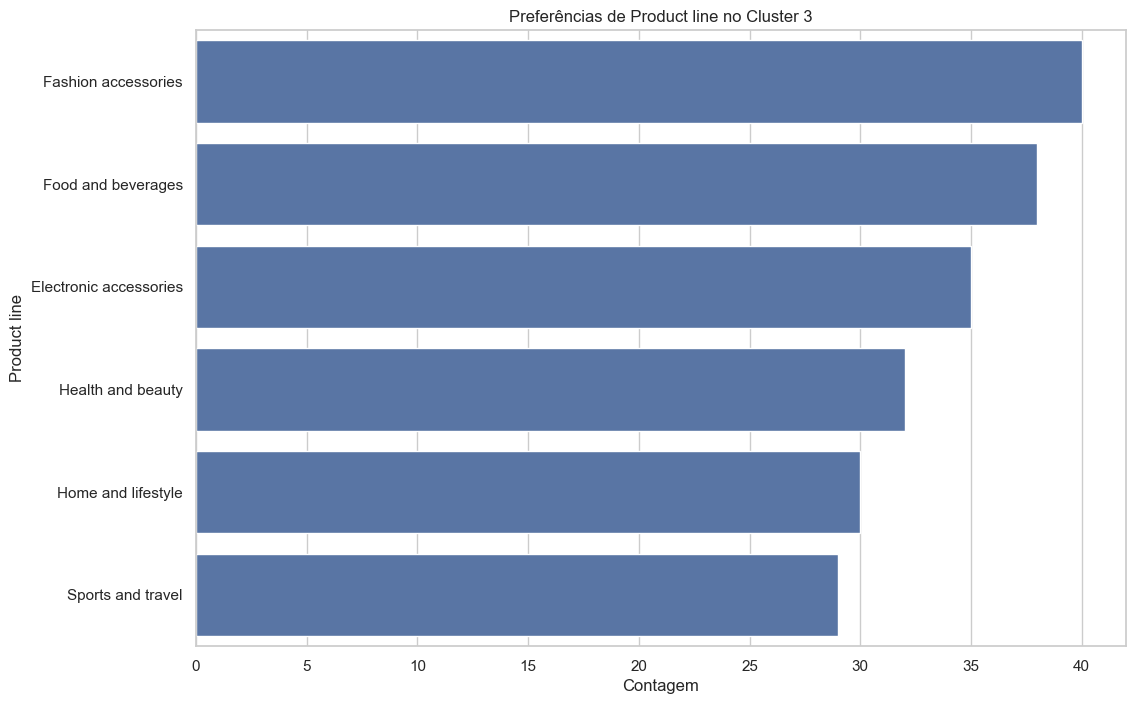

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Product line', data=cluster_3_data, order=cluster_3_data['Product line'].value_counts().index)
plt.title('Preferências de Product line no Cluster 3')
plt.xlabel('Contagem')
plt.ylabel('Product line')
plt.show()


In [21]:
# Matriz de correlação
corr_matrix_cluster_3 = cluster_3_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_cluster_3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação para Cluster 3')
plt.show()


ValueError: could not convert string to float: '226-31-3081'

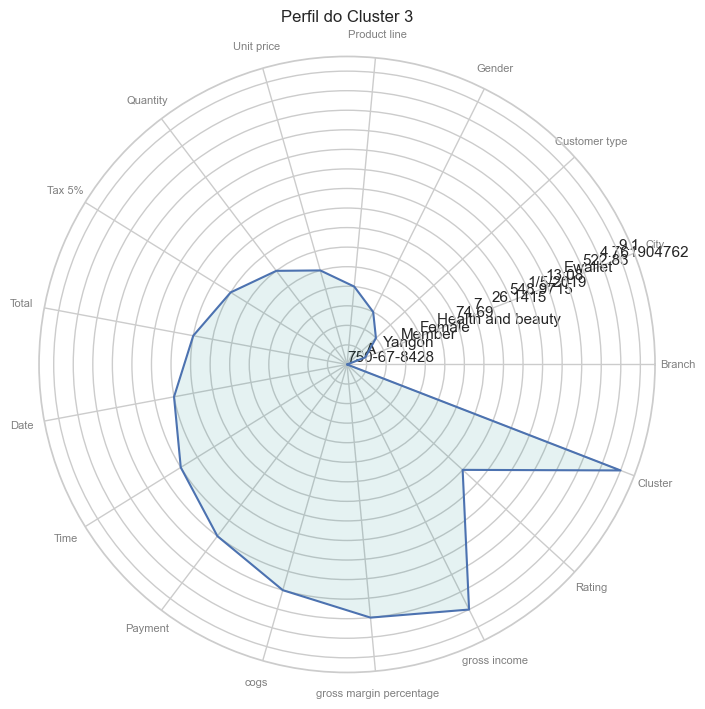

In [26]:
from math import pi
import numpy as np

# Supondo que você tenha um DataFrame com as médias das variáveis para cada cluster
categories = list(cluster_3_data)[1:] # Ignora a coluna de cluster
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, color='grey', size=8)

ax.plot(angles, values)
ax.fill(angles, values, 'teal', alpha=0.1)

plt.title('Perfil do Cluster 3')
plt.show()
